In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import numpy as np


In [4]:
df_pubs = pd.read_pickle("pubs_class_distribution.pkl")

In [3]:
df_db_class = pd.read_pickle("db_sub_and_class_count.pkl")

In [4]:
df_class_distr = pd.read_pickle("class_distribution.pkl")

In [2]:
df_pubs_count = pd.read_pickle("Publisher_and_published_count.pkl")

In [2]:
df_doctype_distr = pd.read_pickle('pubs_class_doctype_distribution.pkl')

FileNotFoundError: [Errno 2] No such file or directory: 'pubs_class_doctype_distribution.pkl'

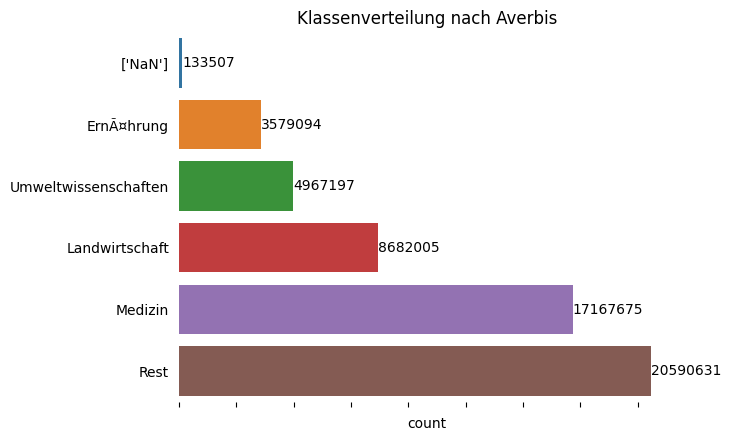

In [5]:
titles= "Klassenverteilung nach Averbis"
fig1= sns.barplot(data=df_class_distr, x="count", y="class")
fig1.set(xticklabels=[])
fig1.set(ylabel=None)
fig1.set(ylabel=None)
fig1.tick_params(left=False)
plt.bar_label(fig1.containers[0], fmt = '%d')
plt.title(titles)
sns.despine(left=True, bottom=True)
plt.savefig(titles+".png")
plt.show(fig1)

In [16]:
df_db_class = df_db_class.astype({'database':'string'})
df_db_class = df_db_class.astype({'class':'string'})
df_db_class = df_db_class.astype({'subdatabase':'string'})
df_db_class["database"] = df_db_class['database'].str.replace('[^\w\s]','',regex = True)
df_db_class["subdatabase"] = df_db_class['subdatabase'].str.replace('[^\w\s]','',regex = True )

In [17]:
df_db_sum = df_db_class.groupby('database').sum()

C:\Users\Keks\AppData\Local\Temp\ipykernel_8952\831376311.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_db_sum = df_db_class.groupby('database').sum()


In [18]:
df_db_sum = df_db_sum.reset_index()

In [19]:
df_db_sum=df_db_sum.sort_values("count", ascending=False)

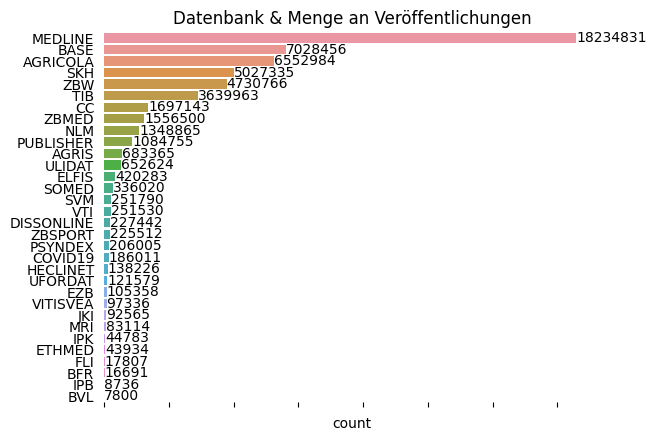

In [10]:
titles= "Datenbank & Menge an Veröffentlichungen"
fig1= sns.barplot(data=df_db_sum, x="count", y="database")
fig1.set(xticklabels=[])
fig1.set(ylabel=None)
fig1.set(ylabel=None)
fig1.tick_params(left=False)
plt.bar_label(fig1.containers[0], fmt = '%d')
plt.title(titles)
sns.despine(left=True, bottom=True)
plt.savefig(titles+".png")
plt.show(fig1)

In [15]:
df_db_class_sum = df_db_class.groupby(['database', 'class'])["count"].apply(lambda x : x.astype(int).sum())
df_db_class_sum= df_db_class_sum.reset_index()
df_db_sum=df_db_sum.sort_values("count", ascending=False)

In [23]:
titles= "Datenbank & Menge an Veröffentlichungen"
fig1= px.histogram(df_db_class_sum, x="class",y="count",color="database", text_auto='.2s')

fig1.show()

In [32]:
df_pubs = pd.read_pickle("pubs_class_distribution.pkl")
df_pubs = df_pubs[df_pubs['count'] > 60000]
df_pubs = df_pubs.astype({'publisher':'string'})
df_pubs = df_pubs.astype({'class':'string'})
df_pubs = df_pubs.astype({'count':'int'})
df_pubs["publisher"] = df_pubs['publisher'].str.replace('[^\w\s]','',regex = True)
df_pubs_n=df_pubs[df_pubs['publisher']=='']
df_pubs['publisher'].replace('', np.nan, inplace=True)
df_pubs_y = df_pubs[df_pubs['publisher'].notna()]

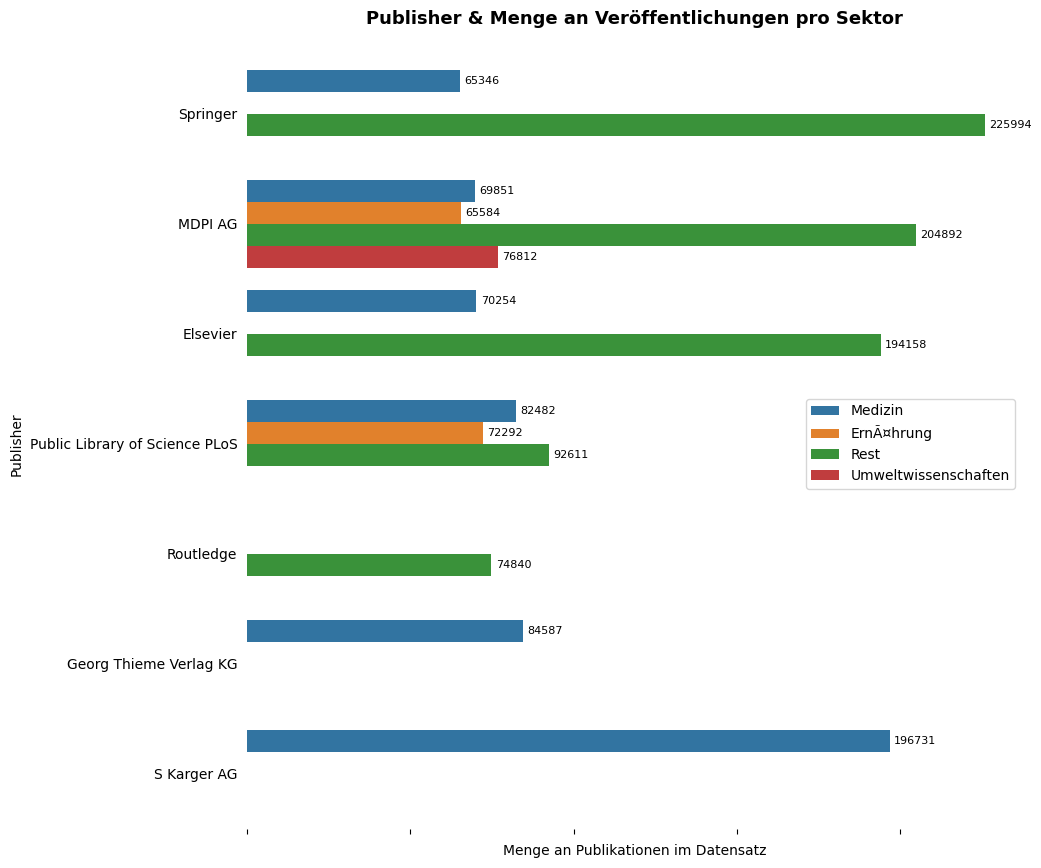

In [36]:
titles ="Publisher & Menge an Veröffentlichungen pro Sektor"
plt.figure(figsize=(10,10))
fig1= sns.barplot(data=df_pubs_y, x="count", y="publisher",hue="class", width = 0.8)
sns.despine(left=True, bottom=True)


fig1.set(xticklabels=[])
fig1.set(ylabel=None)
fig1.set(ylabel=None)
fig1.tick_params(left=False)
plt.legend(loc='best', fontsize=10)
plt.bar_label(fig1.containers[0], fmt = '%d', fontsize=8, rotation=0, padding=3)
plt.bar_label(fig1.containers[1], fmt = '%d', fontsize=8, rotation=0, padding=3)
plt.bar_label(fig1.containers[2], fmt = '%d', fontsize=8, rotation=0, padding=3)
plt.bar_label(fig1.containers[3], fmt = '%d', fontsize=8, rotation=0, padding=3)
#plt.bar_label(fig1.containers[4], fmt = '%d', fontsize=8, rotation=0, padding=3)
#plt.bar_label(fig1.containers[5], fmt = '%d', fontsize=8, rotation=0, padding=3)
fig1.set(xlabel="Menge an Publikationen im Datensatz",
       ylabel="Publisher")
fig1.text(x=0.5, y=1.04, s='Publisher & Menge an Veröffentlichungen pro Sektor',
        fontsize=13, weight='bold',
        ha='center', va='bottom', transform=fig1.transAxes)
plt.savefig(titles+"_60k.png")
plt.show(fig1)

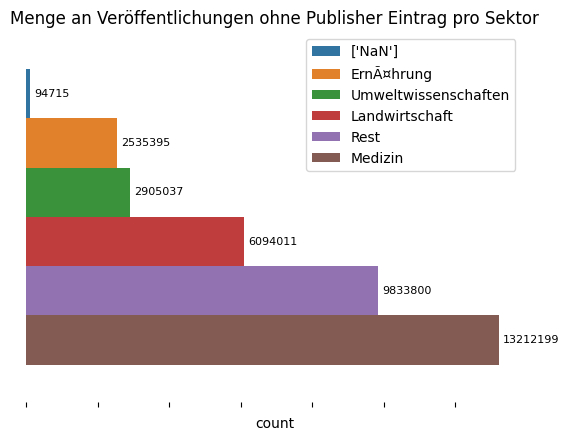

In [112]:
titles= "Menge an Veröffentlichungen ohne Publisher Eintrag pro Sektor"
fig1= sns.barplot(data=df_pubs_n, x="count", y="publisher",hue="class", width = 0.8)
sns.despine(left=True, bottom=True)
fig1.set(xticklabels=[])
fig1.set(ylabel=None)
fig1.set(ylabel=None)
fig1.tick_params(left=False)
plt.legend(loc='best', fontsize=10)
plt.bar_label(fig1.containers[0], fmt = '%d', fontsize=8, rotation=0, padding=3)
plt.bar_label(fig1.containers[1], fmt = '%d', fontsize=8, rotation=0, padding=3)
plt.bar_label(fig1.containers[2], fmt = '%d', fontsize=8, rotation=0, padding=3)
plt.bar_label(fig1.containers[3], fmt = '%d', fontsize=8, rotation=0, padding=3)
plt.bar_label(fig1.containers[4], fmt = '%d', fontsize=8, rotation=0, padding=3)
plt.bar_label(fig1.containers[5], fmt = '%d', fontsize=8, rotation=0, padding=3)
plt.title(titles)
plt.savefig(titles+".png")
plt.show(fig1)

In [8]:
titles= "----"
fig1= sns.barplot(data=df_doctype_distr, x="count", y="doctype",hue="class", width = 0.8)
sns.despine(left=True, bottom=True)
fig1.set(xticklabels=[])
fig1.set(ylabel=None)
fig1.set(ylabel=None)
fig1.tick_params(left=False)
plt.legend(loc='best', fontsize=10)
plt.bar_label(fig1.containers[0], fmt = '%d', fontsize=8, rotation=0, padding=3)
plt.bar_label(fig1.containers[1], fmt = '%d', fontsize=8, rotation=0, padding=3)
plt.bar_label(fig1.containers[2], fmt = '%d', fontsize=8, rotation=0, padding=3)
plt.bar_label(fig1.containers[3], fmt = '%d', fontsize=8, rotation=0, padding=3)
plt.bar_label(fig1.containers[4], fmt = '%d', fontsize=8, rotation=0, padding=3)
plt.bar_label(fig1.containers[5], fmt = '%d', fontsize=8, rotation=0, padding=3)
plt.title(titles)
plt.savefig(titles+".png")
plt.show(fig1)

TypeError: unhashable type: 'list'

In [3]:
df_sort = df_doctype_distr.sort_values(by=["count"],ascending = False)

NameError: name 'df_doctype_distr' is not defined

In [44]:
df_pubs_count

,count,publisher
0,1,A Fritsch Leipzig
1,1,Johannes Hardmeyer
2,1,Johanssen
3,1,John Churchill and Sons JE Adlard
4,1,John Frankenberg in Sachsen
...,...,...
1409254,325019,Public Library of Science PLoS
1409255,353065,Springer
1409256,364096,Elsevier
1409257,472451,MDPI AG


In [3]:
df_pubs_count = df_pubs_count.astype({'publisher':'string'})
df_pubs_count['publisher'] = df_pubs_count['publisher'].str.replace('[^\w\s]','',regex = True)
only_pubs = df_pubs_count[df_pubs_count.publisher != ""]

In [99]:
numof_docs= only_pubs["count"].sum()
numof_alldocs = df_pubs_count["count"].sum()
numof_nopubdocs = numof_alldocs - numof_docs

In [140]:
publist=[]
cmax = only_pubs['count'].max()
cmax_p = only_pubs.loc[only_pubs['count'] == cmax]
#cell_val = cmax_p.iloc[0]['publisher']
print('Die meisten Publikationen hat Verleger ' + str(cmax_p.iloc[0]['publisher']) + ' mit ' + str(cmax) + ' Publikationen')
i = 1
while i < 5000:
    sum_of = df_pubs_count['count'] <= i
    sum_of = sum(sum_of == True) 
    publi_mehr_als_i = len(only_pubs) - sum_of
    daten_prozent = publi_mehr_als_i/len(only_pubs) *100
    daten_prozent = round(daten_prozent, 2)
    #print('Anzahl der Publisher mit weniger als ' + str(i) + ' Publikationen: ' + str(sum_of))
    #print(' Publisher mit mehr als ' + str(i) + ' Publikationen: ' + str(publi_mehr_als_i))
    #print(' Das entsprechen ' + str(daten_prozent) + ' Prozent des Datensatz')
    publist.append([daten_prozent,i,publi_mehr_als_i,len(only_pubs)])
    i = i * 2
publist = pd.DataFrame(publist)
publist.columns=['Prozent','doc_count','pubcount','pubcount_total']

Die meisten Publikationen hat Verleger MDPI AG mit 472451 Publikationen


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


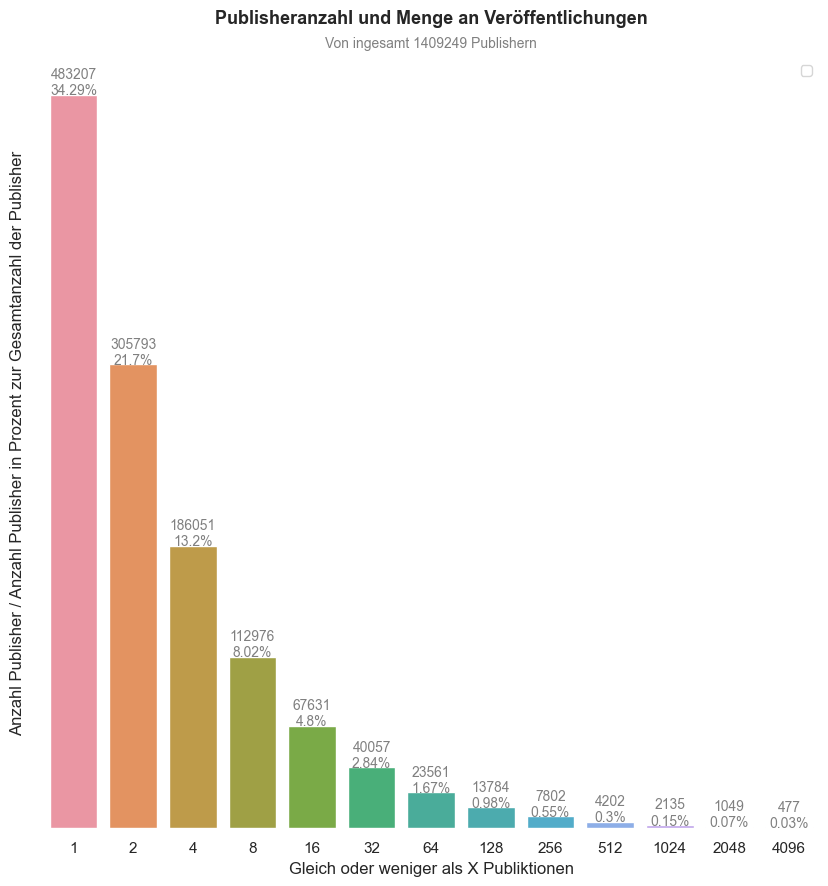

In [141]:
titles ="Publisheranzahl und Menge an Veröffentlichungen"
plt.figure(figsize=(10,10))
sns.set_theme(style="white")
fig1= sns.barplot(data=publist, x="doc_count", y="pubcount")
sns.despine(left=True, bottom=True)
for p in fig1.patches:
    ppercent = p.get_height() / len(only_pubs) * 100
    pheight= str( p.get_height())
    fig1.annotate(pheight[:-2] + '\n'  + str(round(ppercent,2)) + '%', (p.get_x()+0.4, p.get_height()), ha='center', color='grey', size=10)

fig1.tick_params(left=False)
fig1.set(yticklabels=[])

fig1.set(ylabel="Anzahl der Publikationen")
plt.legend(loc='best', fontsize=10)
fig1.set(xlabel="Gleich oder weniger als X Publiktionen",
       ylabel="Anzahl Publisher / Anzahl Publisher in Prozent zur Gesamtanzahl der Publisher")
fig1.text(x=0.5, y=1.04, s= titles,
        fontsize=13, weight='bold',
        ha='center', va='bottom', transform=fig1.transAxes)
fig1.text(x=0.5, y=1.01, s="Von ingesamt " + str(len(only_pubs)) + " Publishern",
        fontsize=10, ha='center', va='bottom', color='grey', transform=fig1.transAxes)
plt.savefig(titles+".png")
plt.show(fig1)

In [111]:
percentof_dok_w_pub = numof_docs/numof_alldocs*100
print(numof_docs)
print(percentof_dok_w_pub)
print(numof_nopubdocs)
li_pubtonopub_ratio = [[numof_docs,numof_nopubdocs,numof_alldocs]]
df_pubtonopub_ratio = pd.DataFrame(li_pubtonopub_ratio)
df_pubtonopub_ratio.columns=['Dokumente mit Publisher','Dokumente ohne Publisher','Gesamtanzahl der Dokumente']

20444910
37.091563080907555
34675199


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


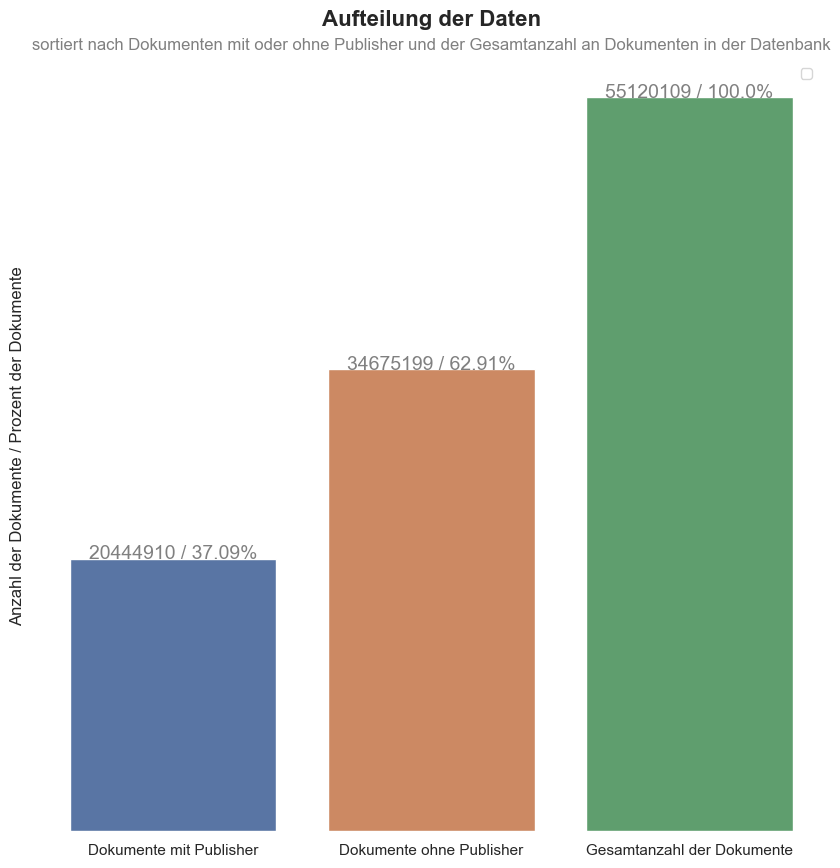

In [116]:
titles ="Aufteilung der Daten"
plt.figure(figsize=(10,10))
sns.set_theme(style="white")
fig1= sns.barplot(data=df_pubtonopub_ratio , orient="v")
sns.despine(left=True, bottom=True)
for p in fig1.patches:
    ppercent = p.get_height() / numof_alldocs * 100
    pheight= str( p.get_height())
    fig1.annotate(pheight[:-2] + ' / '  + str(round(ppercent,2)) + '%', (p.get_x()+0.4, p.get_height()), ha='center', color='grey', size=14)

fig1.tick_params(left=False)
fig1.set(yticklabels=[])

fig1.set(ylabel="Anzahl der Publikationen")
plt.legend(loc='best', fontsize=10)
fig1.set(xlabel="",
       ylabel="Anzahl der Dokumente / Prozent der Dokumente")
fig1.text(x=0.5, y=1.04, s= titles,
        fontsize=16, weight='bold',
        ha='center', va='bottom', transform=fig1.transAxes)
fig1.text(x=0.5, y=1.01, s="sortiert nach Dokumenten mit oder ohne Publisher und der Gesamtanzahl an Dokumenten in der Datenbank",
        fontsize=12, ha='center', va='bottom', color='grey', transform=fig1.transAxes)
plt.savefig(titles+".png")
plt.show(fig1)